# Week 1 Challenge Project
> Original author: Lyle Lalunio


**Hypothyroidism**, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, depression, and weight gain. Occasionally, there may be swelling of the front part of the neck due to **goiter**. Untreated hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or cretinism.

Worldwide, too little **iodine** in the diet is the most common cause of hypothyroidism. In countries with enough iodine in the diet, the most common cause of hypothyroidism is the autoimmune condition **Hashimoto's thyroiditis**. Less common causes include previous treatment with radioactive iodine, injury to the hypothalamus or the anterior pituitary gland, certain medications, a lack of a functioning thyroid at birth, and previous thyroid surgery. The diagnosis of hypothyroidism, when suspected, can be confirmed with **blood tests** measuring thyroid-stimulating hormone (TSH) and thyroxine levels.

About one billion people around the world are estimated to be iodine deficient; however, it is unknown how often this results in hypothyroidism. In the United States, hypothyroidism occurs in nearly **5% of Americans over the age of 12**.

And that is why we iodize salt.

![thyroid-gland.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/thyroid-gland.png)

Doctors all around the world need our help to predict whether a patient has hypothyroidism. We have already **overspent** our budget to collect such comprehensive data on about 30 attributes for 2,800 patients—a good starting number, but a larger sample would certainly be preferred. Moving forward, however, we simply cannot afford to spend so much money on data collection. Therefore, we also need to determine **which attributes are the most meaningful** to the predictive models, and cut out the rest that don't contribute much.

The boss wants to see a **balanced** model that can predict with a **high sensitivity** and **high specificity** while using a ***low amount of features***. Collecting complete data such as this is very rare, very time-consuming, and often very expensive. By minimizing the number of features, we can optimize future data collection and decide what needs to be collected and what doesn't.

## Loading the data

Let's read the data into a Pandas DataFrame and look at the first 20 records.

In [55]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/allhypo.train.csv'
dataset = pd.read_csv(url) # this loads the dataset into a dataframe called `dataset`

### YOUR CODE HERE
### Look up the head() function. Example: dataset.head(5) will show the first 5 rows of the dataset

In [56]:
dataset.columns = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source', 'Class']

Great, looks like the data loaded in properly. Let's continue looking at some summary statistics on our data.

## Viewing summary statistics
The functions `describe()` and `info()` are your friends.

In [57]:
# Output high-level column statistics
dataset.describe()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,264,2,65,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative.|3733
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,2786,2775,2729,2799,2665,2516,284,2215,585,2616,184,2503,297,2505,295,2800,2800,1632,1


In [58]:
# Output information about the data including the index dtype and column dtypes, non-null values and memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2800 non-null   object
 1   Sex                        2800 non-null   object
 2   On Thyroxine               2800 non-null   object
 3   Query on Thyroxine         2800 non-null   object
 4   On Antithyroid Medication  2800 non-null   object
 5   Sick                       2800 non-null   object
 6   Pregnant                   2800 non-null   object
 7   Thyroid Surgery            2800 non-null   object
 8   I131 Treatment             2800 non-null   object
 9   Query Hypothyroid          2800 non-null   object
 10  Query Hyperthyroid         2800 non-null   object
 11  Lithium                    2800 non-null   object
 12  Goiter                     2800 non-null   object
 13  Tumor                      2800 non-null   object
 14  Hypopitu

Note the data types are all objects—even columns that are obviously numeric like `Age`. This is because there are "?" values for some of the cells, making Pandas interpret these columns as `non-null` objects (instead of `int`, for example).

## Data cleaning

To start, let's make all the **numerical columns** contain the correct type of values and change the dtype of those columns to `numeric`. Let's also replace all those **question marks** with `np.nan`.

In [59]:
import numpy as np

# Convert "?" cells to NaN
### YOUR CODE HERE

# HINT: Replace the "?" values with np.nan. Look up the replace() function in the pandas documentation
dataset = dataset.replace('?', np.nan)
dataset.isna().sum()

Age                             1
Sex                           110
On Thyroxine                    0
Query on Thyroxine              0
On Antithyroid Medication       0
Sick                            0
Pregnant                        0
Thyroid Surgery                 0
I131 Treatment                  0
Query Hypothyroid               0
Query Hyperthyroid              0
Lithium                         0
Goiter                          0
Tumor                           0
Hypopituitary                   0
Psych                           0
TSH Measured                    0
TSH                           284
T3 Measured                     0
T3                            585
TT4 Measured                    0
TT4                           184
T4U Measured                    0
T4U                           297
FTI Measured                    0
FTI                           295
TBG Measured                    0
TBG                          2800
Referral Source                 0
Class         

In [60]:
dataset.head(5)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,NaN,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,negative.|2807


In [61]:
# Identify columns by what time of data they hold
numeric_columns = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Categorical columns are everything else (minus 'Class')
categorical_columns = ['Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 
                    'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 
                    'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'T3 Measured', 'TT4 Measured', 
                    'T4U Measured', 'FTI Measured', 'TBG Measured', 'TBG', 'Referral Source']

# Convert numeric columns from strings to numbers
### YOUR CODE HERE
# HINT: Convert numeric columns from strings to actual numbers using pd.to_numeric()
# Print statement for sanity check
print('Numerical Columns:', numeric_columns)
print('Categorical Columns:',categorical_columns)

dataset.head(10)

Numerical Columns: ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Categorical Columns: ['Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'T3 Measured', 'TT4 Measured', 'T4U Measured', 'FTI Measured', 'TBG Measured', 'TBG', 'Referral Source']


,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,NaN,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,NaN,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,NaN,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,NaN,t,183,t,1.3,t,141,f,NaN,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,72,t,0.92,t,78,f,NaN,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,NaN,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,NaN,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,NaN,SVI,negative.|2534


Hmm, still looks like the `TBG` column is unfilled, implying it was empty to begin with. Let's get rid of this column then (and make sure to get rid of it in your list of numeric columns too!)

We also want to drop columns that do not contain useful information (all 2,800 data points have the same value) like `TBG Measured`, which you then want to remove from your list of categorical columns too.

In [63]:
### YOUR CODE HERE
# HINT: Drop columns with constant values like TBG Measured. Look up the drop() function in the pandas documentation
dataset.drop(columns=['TBG Measured'], inplace=True)
categorical_columns.remove('TBG Measured')

All right, let's take a look now at the info of *just the numeric columns* in the dataset:

In [67]:
### YOUR CODE HERE
# convert numeric columns to numeric datatype so that pandas knows they are numeric columns
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric)


# select the numeric columns from the dataset and use the info() function to print a summary of the dataset
dataset[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2799 non-null   float64
 1   TSH     2516 non-null   float64
 2   T3      2215 non-null   float64
 3   TT4     2616 non-null   float64
 4   T4U     2503 non-null   float64
 5   FTI     2505 non-null   float64
dtypes: float64(6)
memory usage: 131.4 KB


Perfect, now let's move onto fixing that `Class` feature. According to the note the data collectors included with this data, the `".|####"` refers to a patient number and is not necessarily relevant for our purposes here.

Here's code we've already written up using regular expressions:

In [81]:
# Import regular expression package
import re

# Define the regular expression for the ".|####" part of dataset['class']

regex_pattern = ( "\."   # looks for the period...
                  "\|"   # followed by a pipe...
                  "\d+") # followed by one or more digit

for index, row in dataset.iterrows():
    
    # Substitute instances of our regex_pattern for an empty string
    new_class = re.sub(regex_pattern, '', row['Class'])
    dataset.loc[index,'Class']=new_class

dataset.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
7,80.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.20,t,0.6,t,80.0,t,0.70,t,115.0,SVI,negative
8,66.0,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.60,t,2.2,t,123.0,t,0.93,t,132.0,SVI,negative
9,68.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.40,t,1.6,t,83.0,t,0.89,t,93.0,SVI,negative


Let's run the `describe()` function on just the `"Class"` column.

In [82]:
### YOUR CODE HERE
dataset['Class'].describe()

count         1947
unique           4
top       negative
freq          1790
Name: Class, dtype: object

It looks like there are 4 unique classification values!

Display all the unique values in the `Class` column.

In [83]:
### YOUR CODE HERE
# Use value_counts() to check for missing values and drop rows with missing data.
dataset['Class'].value_counts()

Class
negative                   1790
compensated hypothyroid     106
primary hypothyroid          50
secondary hypothyroid         1
Name: count, dtype: int64

Let's make this response variable **binary** for now. If you finish this classification task early, try the **multiclass** classifier with all 4 values!

In [84]:
# Change all non-negative classes to the positive class

### YOUR CODE HERE
# HINT: Use the replace() function to change all non-negative classes to the positive class (Use 0 for negative class and 1 for positive class)
dataset['Class'] = dataset['Class'].replace(['compensated hypothyroid', 'secondary hypothyroid', 'primary hypothyroid'], 1)
dataset['Class'] = dataset['Class'].replace('negative', 0)
dataset['Class'].value_counts()

Class
0    1790
1     157
Name: count, dtype: int64

Before we move on, let's not forget to run the `describe()` function on just your categorical columns too.
Compare it to the `describe()` that your numeric columns produce.

In [ ]:
### YOUR CODE HERE
dataset[categorical_columns].describe()

Great! Let's see if there're any other records we have to address. Calling `count()` on the dataset is a nice way to check if we have any other missing values.

In [ ]:
### YOUR CODE HERE
dataset.isna().sum()

There seems to be quite a few rows with missing data. There are techniques you can use to try to handle this situation (and some models in `sklearn` can handle NaN values without a problem). But let's just remove those rows for now.

In [73]:
### YOUR CODE HERE
#### TBG has all missing values. Drop the column:
dataset.drop(columns=['TBG'], inplace=True)
categorical_columns.remove('TBG')
dataset.isna().sum()


Age                            1
Sex                          110
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goiter                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH Measured                   0
TSH                          284
T3 Measured                    0
T3                           585
TT4 Measured                   0
TT4                          184
T4U Measured                   0
T4U                          297
FTI Measured                   0
FTI                          295
Referral Source                0
Class                          0
dtype: int64

In [76]:
### Now let us drop the rows with missing values
dataset.dropna(inplace=True)
dataset.isna().sum()

Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goiter                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Referral Source              0
Class                        0
dtype: int64

**Ooof!**

We just cut out about **30%** of our dataset! You probably won't want to throw out this data for your project, but let's keep going now that we have a clean dataset and do some further data analysis and visualization to better understand what we're working with.

## Data analysis and visualization

Let's check the correlation in the dataset.

The function [**`pandas.corr()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) will compute pairwise correlation of numerical columns, excluding NA/null values. Notice that in this case, since we've converted `Class` to a number (0 or 1), we can see how correlated different features are with the class label!

In [77]:
### YOUR CODE HERE
# HINT: Use pandas.corr() to find correlations between features.
dataset[numeric_columns].corr()

,Age,TSH,T3,TT4,T4U,FTI
Age,1.000000,-0.030174,-0.255721,-0.074538,-0.169724,0.030368
TSH,-0.030174,1.000000,-0.180425,-0.288273,0.055912,-0.331063
T3,-0.255721,-0.180425,1.000000,0.581830,0.465673,0.346873
TT4,-0.074538,-0.288273,0.581830,1.000000,0.450527,0.786326
T4U,-0.169724,0.055912,0.465673,0.450527,1.000000,-0.170805
FTI,0.030368,-0.331063,0.346873,0.786326,-0.170805,1.000000


We can see that FTI and TT4 are highly correlated with eachother, this means knowing one, we can approximately predict the other.

Let's do some visual analysis using a new module called `seaborn`. Explore its incredible versatility and diversity with data visualization here: https://seaborn.pydata.org/.

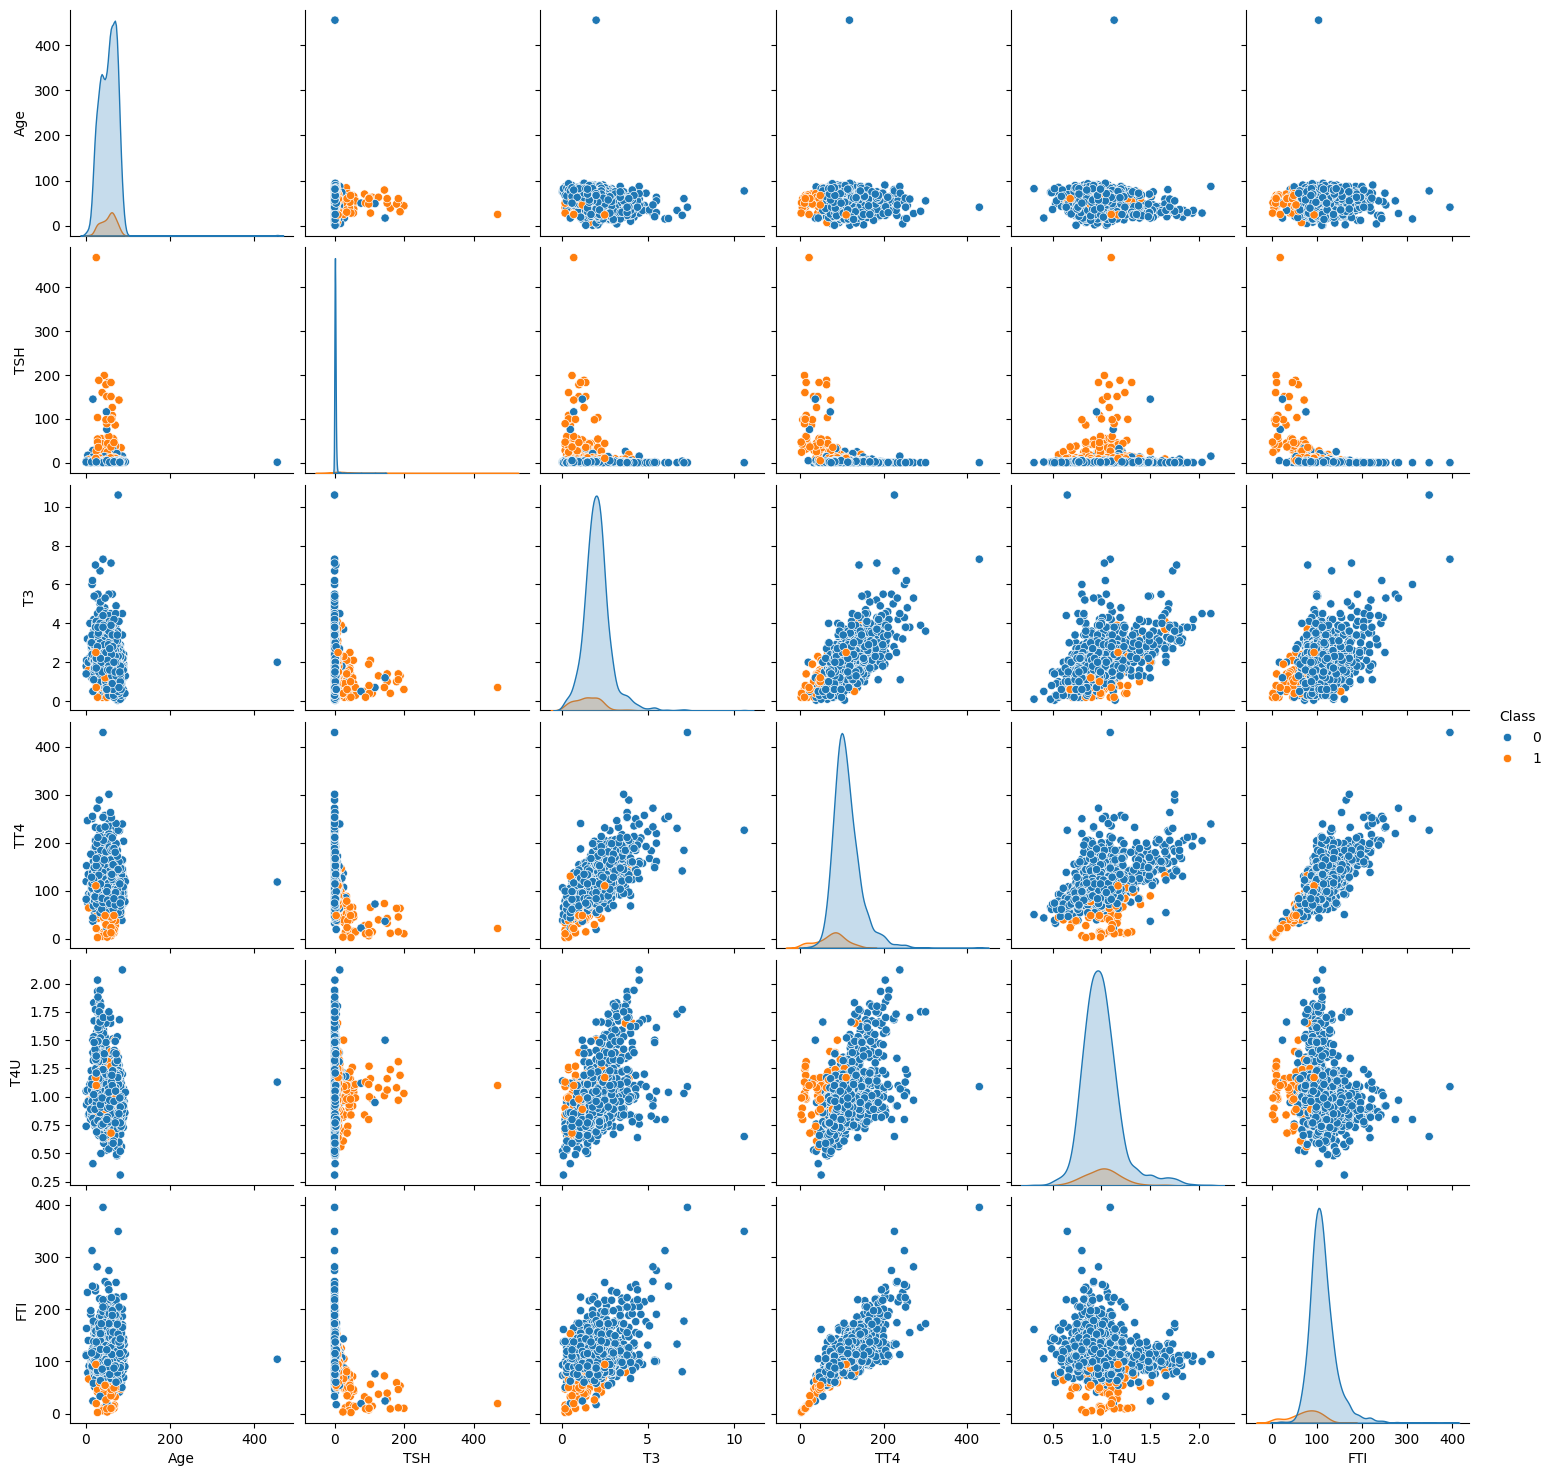

In [88]:
import seaborn as sns
sns.pairplot(dataset, hue='Class', vars=numeric_columns)
# What does this plot tell you? What information can you get from it? Are you able to see a separation between classes?

Let's now see the final summary statistics for our (numerical) data using `describe()`.

In [89]:
### YOUR CODE HERE
dataset[numeric_columns].describe()

,Age,TSH,T3,TT4,T4U,FTI
count,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000
mean,53.216230,4.376097,2.014895,108.760452,0.998692,110.001695
std,20.882261,18.427724,0.824728,35.447159,0.199024,32.386662
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,37.000000,0.450000,1.600000,88.000000,0.880000,93.000000
50%,55.000000,1.300000,2.000000,104.000000,0.980000,107.000000
75%,69.000000,2.500000,2.400000,124.000000,1.090000,123.000000
max,455.000000,468.000000,10.600000,430.000000,2.120000,395.000000


Now let's take a look at our categorical columns! Try `pandas.unique()` or `pandas.value_counts(dropna=False)`.

In [91]:
for col in categorical_columns:
    print(dataset[col].value_counts())

Sex
F    1282
M     665
Name: count, dtype: int64
On Thyroxine
f    1764
t     183
Name: count, dtype: int64
Query on Thyroxine
f    1929
t      18
Name: count, dtype: int64
On Antithyroid Medication
f    1921
t      26
Name: count, dtype: int64
Sick
f    1857
t      90
Name: count, dtype: int64
Pregnant
f    1915
t      32
Name: count, dtype: int64
Thyroid Surgery
f    1922
t      25
Name: count, dtype: int64
I131 Treatment
f    1915
t      32
Name: count, dtype: int64
Query Hypothyroid
f    1851
t      96
Name: count, dtype: int64
Query Hyperthyroid
f    1825
t     122
Name: count, dtype: int64
Lithium
f    1936
t      11
Name: count, dtype: int64
Goiter
f    1932
t      15
Name: count, dtype: int64
Tumor
f    1903
t      44
Name: count, dtype: int64
Hypopituitary
f    1946
t       1
Name: count, dtype: int64
Psych
f    1818
t     129
Name: count, dtype: int64
TSH Measured
t    1947
Name: count, dtype: int64
T3 Measured
t    1947
Name: count, dtype: int64
TT4 Measured
t    1947
Name:

Uh oh . . . We have several features that are non-informative (they only have a single value). We probably didn't notice this before because there were still `'?'` values in there, or perhaps when we threw out that 30% of our data, we got rid of some variation in these features. Let's just drop those columns.

Remember to remove these columns from your list of categorial columns.

In [92]:
# Drop columns that do not contain useful information (all 2800 data points have the same value)
### YOUR CODE HERE
columns_to_drop = ['Hypopituitary', 'TSH Measured', 'T3 Measured', 'TT4 Measured', 'T4U Measured']   #These columns have the same value for all rows, in case of hypopituitary only one row is different, not giving the model enough information
dataset = dataset.drop(columns=columns_to_drop)

We can convert categorical columns (i.e., True/False or Male/Female) into indicator values (0, 1) using a pretty nifty function: [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).  

In [94]:
# Convert categorical columns to indicator (0, 1) variables
### YOUR CODE HERE
for col in columns_to_drop:
    categorical_columns.remove(col)

encoded_dataset = pd.get_dummies(dataset, columns=categorical_columns, dtype='int')

In [95]:
encoded_dataset.head() # This is the dataset we will use for model building!

,Age,TSH,T3,TT4,T4U,FTI,Class,Sex_F,Sex_M,On Thyroxine_f,On Thyroxine_t,Query on Thyroxine_f,Query on Thyroxine_t,On Antithyroid Medication_f,On Antithyroid Medication_t,Sick_f,Sick_t,Pregnant_f,Pregnant_t,Thyroid Surgery_f,Thyroid Surgery_t,I131 Treatment_f,I131 Treatment_t,Query Hypothyroid_f,Query Hypothyroid_t,Query Hyperthyroid_f,Query Hyperthyroid_t,Lithium_f,Lithium_t,Goiter_f,Goiter_t,Tumor_f,Tumor_t,Psych_f,Psych_t,FTI Measured_t,Referral Source_STMW,Referral Source_SVHC,Referral Source_SVHD,Referral Source_SVI,Referral Source_other
0,41.0,1.30,2.5,125.0,1.14,109.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
4,70.0,0.72,1.2,61.0,0.87,70.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0
7,80.0,2.20,0.6,80.0,0.70,115.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0
8,66.0,0.60,2.2,123.0,0.93,132.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0
9,68.0,2.40,1.6,83.0,0.89,93.0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0


## Model training and selection

OK! I think we're ready to create and select some supervised learning models. To get the ball rolling, let's select `Age` and `Sex` as our explanatory features (and `Class` as the target feature, obviously).

We will split our data into training and testing sets in an **80-20** split, stratified by class distribution (`stratify=dataset['Class']`; this tries to keep the class distribution approximately equal for the training and test set). For consistency, let's use a random state of 0 (`random_state=0`).

In [ ]:
from sklearn.model_selection import train_test_split

### YOUR CODE HERE
# HINT: Use train_test_split() to split the data into training and testing sets.

Let's train a **decision tree** model on our training data!

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc

# Define the model
### YOUR CODE HERE

# Fit the model to training data
### YOUR CODE HERE

# Apply the model to test data
### YOUR CODE HERE

Fantastic, we have just built a decision tree! Let's go see how well it performs.

## Model evaluation

### Zero Rule

To start, let's establish the baseline performance. This is important because it provides a starting point of comparison for later evaluation methods, like accuracy.

A good baseline model to use is the **Zero Rule algorithm**. In classification problems, it simply predicts the class value with the greatest number of instances each time.

In [1]:
def zero_rule_algorithm_classification(y_train, y_test):
    ### YOUR CODE HERE
    # Predict 0 for every input sample, regardless of the input data. Does this model perform well? Does it give you any information?
    pass

Get your baseline performance by calculating the accuracy of your Zero Rule algorithm.

In [ ]:
zero_rule_algorithm_classification(y_train, y_val)

Hm, so maybe accuracy isn't the best performance measure for this dataset. As you've seen already, even when the models predict "negative" for all the records, we could already achieve a ~92% accuracy. Using such a model, however, would imply that we incorrectly predict all cases to be positive, which in the context of this problem is fatal.

Thankfully, accuracy isn't the only way to evaluate your model. Let's take a look at a **confusion matrix**.

### Confusion matrix
![confusion_matrix2.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/confusion_matrix2.png)

Create a confusion matrix using the predictions of the decision tree model you built earlier.

In [ ]:
from sklearn.metrics import confusion_matrix

def cm_metric(y_true,y_val_predict):
    # Calculate the confusion matrix
    ### YOUR CODE HERE

cm_metric(y_val, y_val_predict)

### Area under ROC curve

Yet another appropriate metric is the **Area Under the Receiver Operating Characteristic curve**. Specifically, the diagnostic performance of a test, or the accuracy of a test to discriminate diseased cases from normal cases, is evaluated using **Receiver Operating Characteristic** (ROC) curve analysis.

When you consider the results of a particular test in two populations, one population with a disease and the other without the disease, you will rarely observe a perfect separation between the two groups. Hence, there exists an overlap as in the diagram below (which creates **false negatives** and **false positives**).

![roc_overlap.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/roc_overlap.png)

In a Receiver Operating Characteristic (ROC) curve, the **true positive rate** (sensitivity; $\frac {TP} {TP+FN}$) is plotted against the **false positive rate** (1 - specificity; $\frac {TN} {TN+FP}$) for different cutoff points. Each point on the ROC curve represents a TPR/FPR pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has an ROC curve that passes through the upper left corner (100% TPR, 100% FPR). Therefore, the closer the ROC curve is to the *upper-left* corner, the higher the overall accuracy of the test.

![tpr_vs_fpr.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/tpr_vs_fpr.png)

Now, let's calculate the area under the ROC curve with your predictions. Here, we will need the predicted probabilities of choosing a specific class value (`y_val_proba`) rather than the class value (`y_val_predict`) itself.

In [ ]:
from sklearn import metrics

### YOUR CODE HERE

Now graph the ROC curve, fully labeled, using Matplotlib.

In [ ]:
import matplotlib.pyplot as plt

### YOUR CODE HERE

In conclusion, it looks like this model performed pretty badly. Not unexpected, though, since we're only using 2 features! Looking on the bright side, there's a lot of room for improvement!  Try using more features and different models, and see if you can do anything about that 30% of the data we threw out earlier.

## Submitting your model

Once you believe to have found the best classifier, run your classifier on the test data and make a `.pkl` file containing your predictions in a Pandas DataFrame.

This DataFrame will contain 3 columns for your binary classifier (or 5 columns for the multiclass classifier): the first column should be your model's "best guess" for each patient (either 0 or 1, negative or positive) and the last two columns should be the probability the patient would be classified as either a 0 or 1.

Here is an example:
|   | Prediction | 0 | 1   |
|---|---|---|------|
| 0 | 0 | $p_{0,0}$ | $p_{0,1}$|
| 1 | 1 | $p_{1,0}$ | $p_{1,1}$|
| 2 | 1 | $p_{2,0}$ | $p_{2,1}$|
| ... | ... | ... | ...|
| N | 0 | $p_{N,0}$ | $p_{N,1}$|

where $p_{i,j}$ corresponds to the probability of data point $i$ belonging to class $j$.

Here's an example of pickling a DataFrame (saving a `.pkl` file):

In [ ]:
# After running this cell, you should see the pkl file pop up in the file explorer to the left
# Use the three dots next to the filename to download the file
# After downloading the pkl file, email it to the Medlytics staff email

import pickle
predictions = pd.DataFrame({"guesses":[0, 1, 0, 1],"prob_neg":[.75, .15, .63, .20],"prob_pos":[.25, .85, .27, .80]})
prediction_pickle_path = 'team#_week1_v1.pkl'

# Create a variable to pickle and open it in write mode
prediction_pickle = open(prediction_pickle_path, 'wb')
pickle.dump(predictions, prediction_pickle)

prediction_pickle.close()

In [ ]:
prediction_unpickle = open(prediction_pickle_path, 'rb')
 
# Load the unpickled object into a variable
predictions = pickle.load(prediction_unpickle)
 
print(predictions)

   guesses  prob_neg  prob_pos
0        0      0.75      0.25
1        1      0.15      0.85
2        0      0.63      0.27
3        1      0.20      0.80


We will compare your predictions with the true classifications to score your model.

Let's check our full path to see where the pkl file was saved:

## Scoring your model

Navigate to Week 1 in the Medlytics challenge project [**evaluator app**](https://medlytics-evaluator.streamlit.app/) to score your model. (Wake it up if it's asleep!)

#### Modeling considerations:
- You will receive a certain number of points for each correct classification and a certain point penalty for each incorrect classification. The points are weighted and designed to equate to -1 in a Zero Rule baseline model. This point scheme is designed to punish you heavily for predicting false positives (FP) and false negatives (FN)—FN cases especially. In doing so, we hope you see the importance of **clinical considerations** and treat your models from a more **human perspective**, rather than be detached from it.
- Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics—in this case, **economic feasibility**. In essence, we want you to minimize the amount of time and money spent on data collection by reducing the number of features collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method. The full details of the weighted features can be found in the GitHub.

## Presenting your model

Finally, we would like you to be able to present your model to the class. Prepare a presentation with the following things:

* **Features Chosen:** a list of the features used in your model, and an explanation of how you chose them.
* **Type of Model:** an explanation of the model type, parameters used, and why.
* **Evaluation:** at least one plot showing an evaluation of your model against a validation set. You can use a confusion matrix, AUROC, and/or another metric of your choice.

Feel free to include one or two additional plots that describe your process and/or model if you think that would be helpful.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67231ff1-13ba-4f0b-99c2-0fe76b4d3844' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>